<a href="https://colab.research.google.com/github/GergelyTuri/context-project/blob/main/notebooks/colocalizaton_dual_3_5_24_GT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing RNAsocpe colocalization
* 12/1/2023
* troubleshooting and making it interactive --GT

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot

# plot(fig, filename='plot.html', auto_open=True)
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
from os.path import join, dirname

ModuleNotFoundError: No module named 'plotly'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def parse_xml(xml_file_path: str) -> pd.DataFrame:
  tree = ET.parse(xml_file_path)
  root = tree.getroot()

  # Create lists to store data
  types = []
  marker_x_values = []
  marker_y_values = []

  # Iterate through Marker elements
  for marker_type in root.findall('.//Marker_Type'):
      current_type = marker_type.find('Type').text
      for marker in marker_type.findall('.//Marker'):
          marker_x = marker.find('MarkerX').text
          marker_y = marker.find('MarkerY').text

          # Append data to lists
          types.append(current_type)
          marker_x_values.append(marker_x)
          marker_y_values.append(marker_y)

  # Create a DataFrame
  data = {'Type': types, 'MarkerX': marker_x_values, 'MarkerY': marker_y_values}
  df = pd.DataFrame(data)

  # Display the DataFrame
  return df

In [ ]:
def calc_pairwise_dist(dataframe: pd.DataFrame):
    """
    Calculate and return the pairwise distances between points of Type 1 and their closest points of Type 2.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame with columns 'Type', 'MarkerX', and 'MarkerY'.

    Returns:
    - pd.DataFrame: A DataFrame with the coordinates of each Type 1 point, its closest Type 2 point,
                    and the distance between them.
    """
    # Filter and select coordinates based on 'Type', converting directly to int
    type1_df = dataframe.loc[dataframe['Type'] == '1', ['MarkerX', 'MarkerY']].astype(int)
    type2_df = dataframe.loc[dataframe['Type'] == '2', ['MarkerX', 'MarkerY']].astype(int)

    # Calculate pairwise distances
    distances_matrix = cdist(type1_df.values, type2_df.values)

    # Find the closest Type 2 point for each Type 1 point
    closest_indices = np.argmin(distances_matrix, axis=1)

    # Create a new DataFrame with Type 1 and closest Type 2 coordinates
    df_closest = pd.DataFrame({
        'Type1_MarkerX': type1_df['MarkerX'].values,
        'Type1_MarkerY': type1_df['MarkerY'].values,
        'Type2_MarkerX': type2_df.iloc[closest_indices, 0].values,
        'Type2_MarkerY': type2_df.iloc[closest_indices, 1].values,
    })

    # Calculate distances and add a new column
    df_closest['Distance'] = np.sqrt(np.sum((df_closest[['Type1_MarkerX', 'Type1_MarkerY']].values -
                                             df_closest[['Type2_MarkerX', 'Type2_MarkerY']].values) ** 2, axis=1))

    return df_closest

In [ ]:
def plot_distances(dataframe: pd.DataFrame, distance: float=15.0, ax=None, image_path=None):
    """
    Plots distances on a given axis 'ax' over an optional background image specified by 'image_path'.
    """
    if ax is None:
        fig, ax = plt.subplots()

    # If an image path is provided, display the image first
    if image_path:
        image = mpimg.imread(image_path)
        ax.imshow(image)
        ax.axis('off')  # Optionally hide the axis

    df_filtered = dataframe[dataframe['Distance'] < distance]
    columns_to_convert = ['Type1_MarkerX', 'Type1_MarkerY', 'Type2_MarkerX', 'Type2_MarkerY']
    df_filtered[columns_to_convert] = df_filtered[columns_to_convert].astype(float)

    # Create a scatter plot over the image with empty circle markers
    sns.scatterplot(x='Type1_MarkerX', y='Type1_MarkerY', data=df_filtered, palette='Set1', ax=ax,
                    marker='o', facecolors='none', edgecolors='k')  # Adjust edgecolors as needed

    return ax

In [ ]:
# filelocation="/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_1/Cellcounter_dual_10_13_23_series1.xml"
files = [
        # "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_9/CellCounter_xml_series9.xml",
       #  "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_1/Cellcounter_dual_10_13_23_series1.xml",
       #  "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_9/CellCounter_xml_series9.xml",
         #  "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_10/Cellcounter_dual_10_13_23_series10.xml",
       #   "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/3_dual_10_27_23/series_4/CellCounter_xml_series4.xml",
       #    "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/2_dual_10_27_23/series_13/CellCounter_xml_series 13.xml",
        #   "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/2_dual_10_27_23/series_14/CellCounter_xml_series14.xml",
       #    "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/2_dual_10_27_23/series_15/CellCounter_xml_series15.xml",
        #   "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/2_dual_10_27_23/series_16/CellCounter_xml_series16.xml",
        #   "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/1_dual_10_27_23/series_11/CellCounter_xml_series11.xml",
           "/content/drive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/1_dual_10_27_23/series_14/CellCounter_xml_series14.xml",
         ]

In [ ]:
# for xml_file in files:
#   print(f'File name {xml_file}')
#   parsed_df = parse_xml(xml_file)
#   to_plot = calc_pairwise_dist(parsed_df)
#   plot_distances(to_plot, xml_file)

<ipython-input-25-3fd0d333d7e8>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-3fd0d333d7e8>:19: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='Type1_MarkerX', ylabel='Type1_MarkerY'>

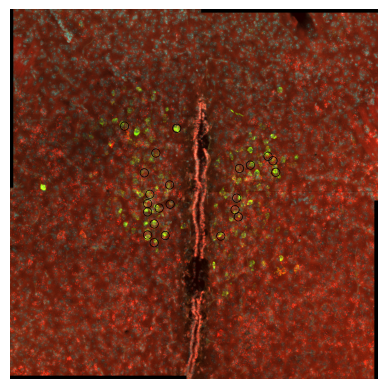

In [ ]:
data = parse_xml(files[0])
pairwise_dist = calc_pairwise_dist(data)
image_path = join(dirname(files[0]), 'CounterWindowComposite_series14png.png')
plot_distances(pairwise_dist, image_path=image_path )

In [ ]:
# Assuming df_filtered is your DataFrame prepared in the plot_distances function
df_filtered = pairwise_dist# Your DataFrame preparation code here

# Load your image
image_path = join(dirname(files[0]), 'CounterWindowComposite_series14png.png')
img = mpimg.imread(image_path)

# Create figure
fig = go.Figure()

# Add image trace
fig.add_trace(go.Image(z=img))

# Add scatter trace
fig.add_trace(go.Scatter(x=df_filtered['Type1_MarkerX'], y=df_filtered['Type1_MarkerY'], mode='markers',
                         marker=dict(color='red', size=10, opacity=0.5, symbol='circle-open')))

# Set axes properties
fig.update_xaxes(showgrid=False, visible=False)
fig.update_yaxes(showgrid=False, visible=False, scaleanchor="x", scaleratio=1)

# Update layout to make sure the plot size matches the image size
fig.update_layout(width=img.shape[1], height=img.shape[0], margin={"r":0,"t":0,"l":0,"b":0})

plot(fig, filename='plot.html', auto_open=True)
# fig.show()


'plot.html'

In [30]:
# Before plotting
!echo "Before plotting:" && free -h
fig.show()
!echo "After plotting:" && free -h

Before plotting:
               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.7Gi       8.0Gi       7.0Mi       2.9Gi        10Gi
Swap:             0B          0B          0B
